Target: AVG

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

In [2]:
x_train=pd.read_csv("AVG\\AVG_train_x_oh.csv")
y_train=pd.read_csv("AVG\\AVG_train_y.csv")
x_test=pd.read_csv("AVG\\AVG_test_x_ohz.csv")
y_test=pd.read_csv("AVG\\AVG_test_y.csv")

In [3]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])
x_test=x_test.drop(columns=["T_ID", "YEAR"])

In [4]:
x_train['target']=y_train['AVG']

In [5]:
corr_x_train=x_train.corr()

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
sign=[0 if abs(e)<0.1 else np.sign(e) for e in corr_x_train['target'].to_list()]
sign=sign[:-1]

In [8]:
remove_idx=[idx for idx,i in enumerate(sign) if (i==0)]

In [9]:
x_train=x_train.drop(columns=['target'])

In [10]:
x_train=x_train.drop(columns=[i for idx,i in enumerate(x_train.columns) if idx in remove_idx])

In [11]:
x_test=x_test.drop(columns=[i for idx,i in enumerate(x_test.columns) if idx in remove_idx])

In [12]:
sign=[i for i in sign if i!=0]

In [13]:
x_train=x_train*sign

In [14]:
x_test=x_test*sign

In [15]:
x_test

,shift_AVG,shift_GPA,shift_ISO,shift_OBP,shift_OPS,shift_P_HRA_RT,shift_RC,shift_SECA,shift_SLG,shift_TA,shift_oISO,shift_oOPS,shift_oSLG,shift_vs_CB_WHIP_RT,shift_vs_DER,shift_vs_ERA,shift_vs_FIP,shift_vs_HR_9,shift_vs_H_9,shift_vs_ISO,shift_vs_K_9,shift_vs_LOB,shift_vs_OPS,shift_vs_P2_WHIP_RT,shift_vs_P_WHIP_RT,shift_vs_SLG,shift_vs_TA,shift_vs_WHIP,shift_vs_oAVG,shift_vs_oISO,shift_vs_oOBP,shift_vs_oOPS,shift_vs_oSLG,shift_wOBA
0,0.293083,0.268321,0.135991,0.357895,0.786969,7.484545,0.780885,0.307151,0.429074,0.743631,0.161137,0.834359,0.471564,1.824661,-0.668622,5.915493,1.183099,1.014085,10.563380,0.158140,-6.971831,-0.597258,0.838947,2.508846,1.666098,0.462791,0.842444,1.525822,0.293083,0.135991,0.342105,0.771179,0.429074,0.388722
1,0.293286,0.281933,0.184923,0.360847,0.839056,5.788382,0.831039,0.375736,0.478210,0.824561,0.144379,0.826465,0.453254,1.940936,-0.679699,5.518868,2.127358,1.613208,10.570755,0.142857,-6.707547,-0.684503,0.832936,1.869886,1.359285,0.448478,0.811897,1.518868,0.297136,0.187351,0.340741,0.825228,0.484487,0.408927
2,0.281437,0.253729,0.110180,0.346278,0.737895,5.433328,0.673684,0.282635,0.391617,0.685484,0.167260,0.840698,0.476868,2.061418,-0.674521,3.857143,0.612245,0.635793,9.960754,0.167658,-6.781790,-0.730000,0.853534,1.703920,1.368628,0.478002,0.841584,1.469388,0.281100,0.110048,0.336570,0.727718,0.391148,0.366139
3,0.294471,0.262976,0.125000,0.351351,0.770823,6.283159,0.704129,0.300481,0.419471,0.729642,0.121175,0.751138,0.410037,1.839435,-0.657778,5.091918,0.793978,0.812995,10.483360,0.120292,-6.717908,-0.650134,0.770395,2.138345,1.341337,0.407047,0.757377,1.511886,0.299145,0.126984,0.343784,0.769913,0.426129,0.377988
4,0.256250,0.253391,0.106250,0.361702,0.724202,5.280412,1.061830,0.355000,0.362500,0.741214,0.177322,0.837855,0.480097,1.982386,-0.682848,3.875394,1.064669,0.681388,8.730284,0.176471,-7.878549,-0.755668,0.846326,1.711120,1.627467,0.477791,0.780096,1.537855,0.264516,0.109677,0.345745,0.719938,0.374194,0.389660
5,0.294611,0.283405,0.153293,0.380952,0.828857,6.837590,1.169927,0.373653,0.447904,0.829032,0.136585,0.754291,0.410976,1.765845,-0.650470,5.602184,1.572543,1.179407,10.361934,0.136253,-8.045242,-0.693431,0.762917,1.885017,1.811773,0.409976,0.747981,1.624025,0.296386,0.154217,0.359213,0.809816,0.450602,0.425259
6,0.297974,0.296301,0.201430,0.381001,0.880405,8.538454,1.253085,0.436234,0.499404,0.901135,0.155689,0.775424,0.437126,2.058270,-0.681073,7.259434,2.655660,1.655660,10.613208,0.154578,-6.452830,-0.606156,0.785071,2.454198,2.395486,0.434007,0.748428,1.674528,0.300842,0.203369,0.362615,0.866827,0.504212,0.445120
7,0.286055,0.264029,0.145411,0.347027,0.778493,6.091144,0.702531,0.318236,0.431466,0.745955,0.132353,0.781885,0.427696,1.611206,-0.655763,4.457547,0.853774,1.061321,10.188679,0.130277,-8.023585,-0.716783,0.787903,1.542542,1.268762,0.420989,0.746388,1.433962,0.288115,0.146459,0.328649,0.763222,0.434574,0.379175
8,0.329186,0.294895,0.159502,0.383828,0.872516,8.900867,1.160563,0.350679,0.488688,0.856220,0.194048,0.859162,0.500000,2.268655,-0.635744,7.105263,1.339713,1.033493,12.531100,0.191090,-6.114833,-0.568248,0.864108,3.105906,2.252446,0.492380,0.920968,1.751196,0.332192,0.160959,0.374616,0.867767,0.493151,0.421222
9,0.297398,0.282030,0.161090,0.372017,0.830506,6.050516,0.975103,0.391574,0.458488,0.831126,0.141818,0.755993,0.429091,1.615427,-0.666161,5.305112,1.595847,1.035144,10.351438,0.139785,-6.081470,-0.688429,0.769134,1.889945,1.678211,0.422939,0.714968,1.619808,0.306513,0.166028,0.366594,0.839136,0.472542,0.414062


In [16]:
x_train

,shift_AVG,shift_GPA,shift_ISO,shift_OBP,shift_OPS,shift_P_HRA_RT,shift_RC,shift_SECA,shift_SLG,shift_TA,shift_oISO,shift_oOPS,shift_oSLG,shift_vs_CB_WHIP_RT,shift_vs_DER,shift_vs_ERA,shift_vs_FIP,shift_vs_HR_9,shift_vs_H_9,shift_vs_ISO,shift_vs_K_9,shift_vs_LOB,shift_vs_OPS,shift_vs_P2_WHIP_RT,shift_vs_P_WHIP_RT,shift_vs_SLG,shift_vs_TA,shift_vs_WHIP,shift_vs_oAVG,shift_vs_oISO,shift_vs_oOBP,shift_vs_oOPS,shift_vs_oSLG,shift_wOBA
0,0.253317,0.249023,0.133896,0.338266,0.725480,5.206516,0.652159,0.325694,0.387214,0.702028,0.128655,0.782226,0.424561,1.791739,-0.698083,4.555215,1.297546,1.118098,8.696319,0.129717,-7.950920,-0.726435,0.799286,1.544842,1.419553,0.428066,0.706539,1.417178,0.256410,0.135531,0.325581,0.717523,0.391941,0.366735
1,0.291169,0.265912,0.120525,0.362196,0.773891,6.709970,0.822826,0.300716,0.411695,0.739269,0.100613,0.721829,0.377914,1.971825,-0.661337,4.659476,0.730354,0.582435,10.151002,0.099635,-6.614792,-0.661719,0.731913,1.626840,1.796928,0.374241,0.710191,1.511556,0.293976,0.121687,0.345301,0.760964,0.415663,0.383094
2,0.305842,0.270899,0.112257,0.369722,0.787820,5.989481,1.130161,0.290951,0.418099,0.768371,0.158205,0.791712,0.449823,2.194593,-0.644570,5.148837,0.795349,0.711628,11.176744,0.156725,-6.823256,-0.683174,0.813171,1.630535,1.620795,0.445614,0.849057,1.609302,0.310827,0.114086,0.356334,0.781246,0.424913,0.393585
3,0.297110,0.278986,0.145665,0.373984,0.816758,6.976934,1.196386,0.357225,0.442775,0.816746,0.164663,0.805807,0.456731,2.208410,-0.665248,5.833333,1.435185,0.958333,10.708333,0.162901,-6.583333,-0.634306,0.827613,2.127660,1.930443,0.451843,0.864434,1.643519,0.300585,0.147368,0.360772,0.808726,0.447953,0.409351
4,0.256379,0.251471,0.136087,0.340788,0.733255,5.257798,0.651505,0.325638,0.392467,0.707087,0.129260,0.797149,0.433608,1.810489,-0.692926,4.722910,1.304954,1.128483,8.818885,0.129870,-7.982972,-0.715804,0.813780,1.560868,1.446338,0.435655,0.712681,1.430341,0.258578,0.137255,0.328009,0.723842,0.395833,0.368900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.246172,0.219723,0.082450,0.305705,0.634327,5.463789,0.121708,0.229682,0.328622,0.567771,0.102091,0.702120,0.378844,1.966856,-0.687231,3.911215,0.967290,0.420561,9.420561,0.112845,-5.635514,-0.723404,0.753949,1.657445,1.774380,0.398559,0.717781,1.537383,0.276543,0.091358,0.345226,0.713127,0.367901,0.311684
2916,0.281707,0.262321,0.120732,0.359358,0.761797,6.440840,0.958419,0.319512,0.402439,0.736842,0.130602,0.704292,0.385403,1.723063,-0.715339,3.965625,0.735938,0.464062,8.606250,0.090794,-5.653125,-0.682944,0.652081,1.405532,1.354374,0.337957,0.622793,1.335938,0.255319,0.096370,0.314223,0.665912,0.351690,0.390134
2917,0.270784,0.260047,0.125891,0.357508,0.754182,5.927760,1.068148,0.352732,0.396675,0.752366,0.104592,0.627842,0.343112,2.039782,-0.656109,5.460674,1.165329,0.866774,10.574639,0.125293,-7.020867,-0.655280,0.744916,1.888837,1.857078,0.402810,0.662500,1.646870,0.299020,0.149510,0.360379,0.808909,0.448529,0.394146
2918,0.252061,0.225535,0.084806,0.314041,0.650908,5.356646,0.202244,0.236749,0.336867,0.586103,0.107843,0.719625,0.390931,1.941856,-0.691198,3.911215,1.004673,0.378505,9.210280,0.112727,-5.509346,-0.720339,0.751463,1.645627,1.730630,0.393939,0.738562,1.528037,0.273067,0.091022,0.343849,0.707938,0.364090,0.321257


In [17]:
y_train=y_train.drop(columns=["T_ID", "YEAR"])

In [18]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [19]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2,
  callbacks=[PrintDot()])

Train on 2336 samples, validate on 584 samples
Epoch 1/500

.2336/2336 - 1s - loss: 0.0401 - mae: 0.1519 - mse: 0.0401 - val_loss: 0.0393 - val_mae: 0.1917 - val_mse: 0.0393
Epoch 2/500
.2336/2336 - 0s - loss: 0.0155 - mae: 0.1129 - mse: 0.0155 - val_loss: 0.0075 - val_mae: 0.0831 - val_mse: 0.0075
Epoch 3/500
.2336/2336 - 0s - loss: 0.0062 - mae: 0.0644 - mse: 0.0062 - val_loss: 0.0076 - val_mae: 0.0802 - val_mse: 0.0076
Epoch 4/500
.2336/2336 - 0s - loss: 0.0036 - mae: 0.0503 - mse: 0.0036 - val_loss: 9.2437e-04 - val_mae: 0.0239 - val_mse: 9.2437e-04
Epoch 5/500
.2336/2336 - 0s - loss: 0.0020 - mae: 0.0364 - mse: 0.0020 - val_loss: 0.0012 - val_mae: 0.0281 - val_mse: 0.0012
Epoch 6/500
.2336/2336 - 0s - loss: 0.0014 - mae: 0.0305 - mse: 0.0014 - val_loss: 5.8587e-04 - val_mae: 0.0195 - val_mse: 5.8587e-04
Epoch 7/500
.2336/2336 - 0s - loss: 0.0012 - mae: 0.0285 - mse: 0.0012 - val_loss: 9.9921e-04 - val_mae: 0.0256 - val_mse: 9.9921e-04
Epoch 8/500
.2336/2336 - 0s - loss: 0.0010 - m

Epoch 58/500
.2336/2336 - 0s - loss: 3.0059e-04 - mae: 0.0137 - mse: 3.0059e-04 - val_loss: 7.9737e-04 - val_mae: 0.0237 - val_mse: 7.9737e-04
Epoch 59/500
.2336/2336 - 0s - loss: 3.1244e-04 - mae: 0.0140 - mse: 3.1244e-04 - val_loss: 6.8730e-04 - val_mae: 0.0211 - val_mse: 6.8730e-04
Epoch 60/500
.2336/2336 - 0s - loss: 2.9423e-04 - mae: 0.0135 - mse: 2.9423e-04 - val_loss: 6.4250e-04 - val_mae: 0.0197 - val_mse: 6.4250e-04
Epoch 61/500
.2336/2336 - 0s - loss: 2.9782e-04 - mae: 0.0136 - mse: 2.9782e-04 - val_loss: 6.1194e-04 - val_mae: 0.0199 - val_mse: 6.1194e-04
Epoch 62/500
.2336/2336 - 0s - loss: 2.9139e-04 - mae: 0.0135 - mse: 2.9139e-04 - val_loss: 6.4828e-04 - val_mae: 0.0203 - val_mse: 6.4828e-04
Epoch 63/500
.2336/2336 - 0s - loss: 2.9519e-04 - mae: 0.0136 - mse: 2.9519e-04 - val_loss: 7.3630e-04 - val_mae: 0.0221 - val_mse: 7.3630e-04
Epoch 64/500
.2336/2336 - 0s - loss: 2.9063e-04 - mae: 0.0135 - mse: 2.9063e-04 - val_loss: 8.5295e-04 - val_mae: 0.0248 - val_mse: 8.5295e-04

Epoch 116/500
.2336/2336 - 0s - loss: 2.0735e-04 - mae: 0.0113 - mse: 2.0735e-04 - val_loss: 7.9393e-04 - val_mae: 0.0223 - val_mse: 7.9393e-04
Epoch 117/500
.2336/2336 - 0s - loss: 2.1693e-04 - mae: 0.0113 - mse: 2.1693e-04 - val_loss: 0.0011 - val_mae: 0.0281 - val_mse: 0.0011
Epoch 118/500
.2336/2336 - 0s - loss: 2.1448e-04 - mae: 0.0114 - mse: 2.1448e-04 - val_loss: 0.0010 - val_mae: 0.0265 - val_mse: 0.0010
Epoch 119/500
.2336/2336 - 0s - loss: 2.0914e-04 - mae: 0.0113 - mse: 2.0914e-04 - val_loss: 7.3817e-04 - val_mae: 0.0215 - val_mse: 7.3817e-04
Epoch 120/500
.2336/2336 - 0s - loss: 2.1391e-04 - mae: 0.0115 - mse: 2.1391e-04 - val_loss: 9.0715e-04 - val_mae: 0.0240 - val_mse: 9.0715e-04
Epoch 121/500
.2336/2336 - 0s - loss: 2.0065e-04 - mae: 0.0109 - mse: 2.0065e-04 - val_loss: 8.7476e-04 - val_mae: 0.0240 - val_mse: 8.7476e-04
Epoch 122/500
.2336/2336 - 0s - loss: 2.0772e-04 - mae: 0.0112 - mse: 2.0772e-04 - val_loss: 7.7887e-04 - val_mae: 0.0227 - val_mse: 7.7887e-04
Epoch 12

Epoch 174/500
.2336/2336 - 0s - loss: 1.7312e-04 - mae: 0.0103 - mse: 1.7312e-04 - val_loss: 7.4301e-04 - val_mae: 0.0218 - val_mse: 7.4302e-04
Epoch 175/500
.2336/2336 - 0s - loss: 1.6575e-04 - mae: 0.0101 - mse: 1.6575e-04 - val_loss: 9.6253e-04 - val_mae: 0.0258 - val_mse: 9.6253e-04
Epoch 176/500
.2336/2336 - 0s - loss: 1.6593e-04 - mae: 0.0100 - mse: 1.6593e-04 - val_loss: 8.8488e-04 - val_mae: 0.0247 - val_mse: 8.8488e-04
Epoch 177/500
.2336/2336 - 0s - loss: 1.7473e-04 - mae: 0.0102 - mse: 1.7473e-04 - val_loss: 0.0011 - val_mae: 0.0287 - val_mse: 0.0011
Epoch 178/500
.2336/2336 - 0s - loss: 1.6979e-04 - mae: 0.0100 - mse: 1.6979e-04 - val_loss: 7.2386e-04 - val_mae: 0.0220 - val_mse: 7.2386e-04
Epoch 179/500
.2336/2336 - 0s - loss: 1.6149e-04 - mae: 0.0099 - mse: 1.6149e-04 - val_loss: 0.0011 - val_mae: 0.0274 - val_mse: 0.0011
Epoch 180/500
.2336/2336 - 0s - loss: 1.6932e-04 - mae: 0.0100 - mse: 1.6932e-04 - val_loss: 0.0011 - val_mae: 0.0277 - val_mse: 0.0011
Epoch 181/500
.2

Epoch 232/500
.2336/2336 - 0s - loss: 1.4726e-04 - mae: 0.0093 - mse: 1.4726e-04 - val_loss: 7.9249e-04 - val_mae: 0.0224 - val_mse: 7.9249e-04
Epoch 233/500
.2336/2336 - 0s - loss: 1.3897e-04 - mae: 0.0091 - mse: 1.3897e-04 - val_loss: 8.6628e-04 - val_mae: 0.0241 - val_mse: 8.6628e-04
Epoch 234/500
.2336/2336 - 0s - loss: 1.4795e-04 - mae: 0.0093 - mse: 1.4795e-04 - val_loss: 0.0012 - val_mae: 0.0296 - val_mse: 0.0012
Epoch 235/500
.2336/2336 - 0s - loss: 1.3962e-04 - mae: 0.0091 - mse: 1.3962e-04 - val_loss: 7.0409e-04 - val_mae: 0.0208 - val_mse: 7.0409e-04
Epoch 236/500
.2336/2336 - 0s - loss: 1.3524e-04 - mae: 0.0091 - mse: 1.3524e-04 - val_loss: 7.2838e-04 - val_mae: 0.0220 - val_mse: 7.2838e-04
Epoch 237/500
.2336/2336 - 0s - loss: 1.4330e-04 - mae: 0.0093 - mse: 1.4330e-04 - val_loss: 8.4473e-04 - val_mae: 0.0241 - val_mse: 8.4473e-04
Epoch 238/500
.2336/2336 - 0s - loss: 1.4091e-04 - mae: 0.0092 - mse: 1.4091e-04 - val_loss: 8.0878e-04 - val_mae: 0.0229 - val_mse: 8.0878e-04


Epoch 291/500
.2336/2336 - 0s - loss: 1.3167e-04 - mae: 0.0089 - mse: 1.3167e-04 - val_loss: 0.0011 - val_mae: 0.0267 - val_mse: 0.0011
Epoch 292/500
.2336/2336 - 0s - loss: 1.2184e-04 - mae: 0.0085 - mse: 1.2184e-04 - val_loss: 8.3208e-04 - val_mae: 0.0235 - val_mse: 8.3208e-04
Epoch 293/500
.2336/2336 - 0s - loss: 1.3490e-04 - mae: 0.0091 - mse: 1.3490e-04 - val_loss: 8.3366e-04 - val_mae: 0.0236 - val_mse: 8.3366e-04
Epoch 294/500
.2336/2336 - 0s - loss: 1.2279e-04 - mae: 0.0086 - mse: 1.2279e-04 - val_loss: 9.6841e-04 - val_mae: 0.0258 - val_mse: 9.6841e-04
Epoch 295/500
.2336/2336 - 0s - loss: 1.2369e-04 - mae: 0.0087 - mse: 1.2369e-04 - val_loss: 8.2955e-04 - val_mae: 0.0232 - val_mse: 8.2955e-04
Epoch 296/500
.2336/2336 - 0s - loss: 1.3118e-04 - mae: 0.0089 - mse: 1.3118e-04 - val_loss: 0.0013 - val_mae: 0.0298 - val_mse: 0.0013
Epoch 297/500
.2336/2336 - 0s - loss: 1.2540e-04 - mae: 0.0087 - mse: 1.2540e-04 - val_loss: 0.0014 - val_mae: 0.0317 - val_mse: 0.0014
Epoch 298/500
.2

.2336/2336 - 0s - loss: 1.1968e-04 - mae: 0.0084 - mse: 1.1968e-04 - val_loss: 8.5849e-04 - val_mae: 0.0236 - val_mse: 8.5849e-04
Epoch 350/500
.2336/2336 - 0s - loss: 1.2261e-04 - mae: 0.0085 - mse: 1.2261e-04 - val_loss: 9.3023e-04 - val_mae: 0.0247 - val_mse: 9.3023e-04
Epoch 351/500
.2336/2336 - 0s - loss: 1.1175e-04 - mae: 0.0082 - mse: 1.1175e-04 - val_loss: 8.5711e-04 - val_mae: 0.0239 - val_mse: 8.5711e-04
Epoch 352/500
.2336/2336 - 0s - loss: 1.2074e-04 - mae: 0.0084 - mse: 1.2074e-04 - val_loss: 8.8808e-04 - val_mae: 0.0244 - val_mse: 8.8808e-04
Epoch 353/500
.2336/2336 - 0s - loss: 1.2145e-04 - mae: 0.0085 - mse: 1.2145e-04 - val_loss: 9.2944e-04 - val_mae: 0.0250 - val_mse: 9.2944e-04
Epoch 354/500
.2336/2336 - 0s - loss: 1.1514e-04 - mae: 0.0083 - mse: 1.1514e-04 - val_loss: 0.0011 - val_mae: 0.0284 - val_mse: 0.0011
Epoch 355/500
.2336/2336 - 0s - loss: 1.1882e-04 - mae: 0.0084 - mse: 1.1882e-04 - val_loss: 0.0012 - val_mae: 0.0286 - val_mse: 0.0012
Epoch 356/500
.2336/23

Epoch 408/500
.2336/2336 - 0s - loss: 1.0260e-04 - mae: 0.0079 - mse: 1.0260e-04 - val_loss: 8.7372e-04 - val_mae: 0.0239 - val_mse: 8.7372e-04
Epoch 409/500
.2336/2336 - 0s - loss: 1.0489e-04 - mae: 0.0079 - mse: 1.0489e-04 - val_loss: 8.5995e-04 - val_mae: 0.0239 - val_mse: 8.5995e-04
Epoch 410/500
.2336/2336 - 0s - loss: 1.1448e-04 - mae: 0.0083 - mse: 1.1448e-04 - val_loss: 7.6888e-04 - val_mae: 0.0225 - val_mse: 7.6888e-04
Epoch 411/500
.2336/2336 - 0s - loss: 1.0617e-04 - mae: 0.0080 - mse: 1.0617e-04 - val_loss: 7.8975e-04 - val_mae: 0.0222 - val_mse: 7.8975e-04
Epoch 412/500
.2336/2336 - 0s - loss: 1.0283e-04 - mae: 0.0078 - mse: 1.0283e-04 - val_loss: 9.2520e-04 - val_mae: 0.0245 - val_mse: 9.2520e-04
Epoch 413/500
.2336/2336 - 0s - loss: 1.0276e-04 - mae: 0.0078 - mse: 1.0276e-04 - val_loss: 8.4707e-04 - val_mae: 0.0239 - val_mse: 8.4707e-04
Epoch 414/500
.2336/2336 - 0s - loss: 1.0465e-04 - mae: 0.0079 - mse: 1.0465e-04 - val_loss: 0.0012 - val_mae: 0.0283 - val_mse: 0.0012


Epoch 467/500
.2336/2336 - 0s - loss: 1.0177e-04 - mae: 0.0077 - mse: 1.0177e-04 - val_loss: 9.5510e-04 - val_mae: 0.0260 - val_mse: 9.5510e-04
Epoch 468/500
.2336/2336 - 0s - loss: 1.0373e-04 - mae: 0.0078 - mse: 1.0373e-04 - val_loss: 9.1312e-04 - val_mae: 0.0252 - val_mse: 9.1312e-04
Epoch 469/500
.2336/2336 - 0s - loss: 9.3403e-05 - mae: 0.0075 - mse: 9.3403e-05 - val_loss: 0.0010 - val_mae: 0.0266 - val_mse: 0.0010
Epoch 470/500
.2336/2336 - 0s - loss: 9.7734e-05 - mae: 0.0077 - mse: 9.7734e-05 - val_loss: 8.9683e-04 - val_mae: 0.0247 - val_mse: 8.9683e-04
Epoch 471/500
.2336/2336 - 0s - loss: 9.7580e-05 - mae: 0.0075 - mse: 9.7580e-05 - val_loss: 8.1925e-04 - val_mae: 0.0236 - val_mse: 8.1925e-04
Epoch 472/500
.2336/2336 - 0s - loss: 9.1833e-05 - mae: 0.0074 - mse: 9.1833e-05 - val_loss: 8.9258e-04 - val_mae: 0.0246 - val_mse: 8.9258e-04
Epoch 473/500
.2336/2336 - 0s - loss: 9.5673e-05 - mae: 0.0076 - mse: 9.5673e-05 - val_loss: 8.6429e-04 - val_mae: 0.0243 - val_mse: 8.6429e-04


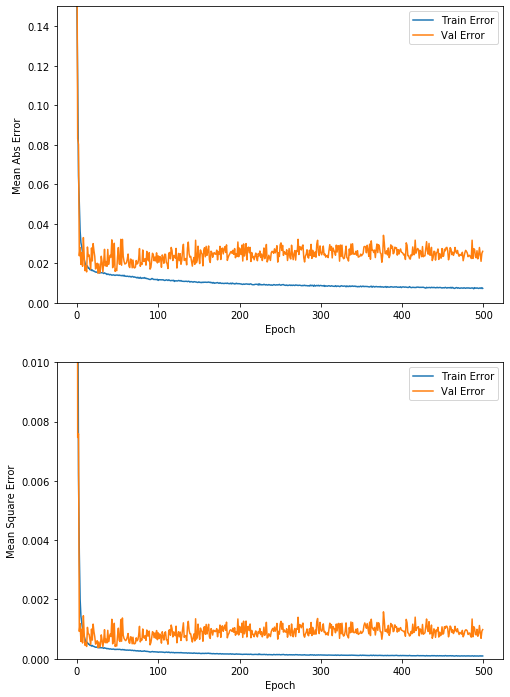

In [21]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.15])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.legend()
  plt.show()

plot_history(history)

In [22]:
y_TID=y_test["T_ID"]
y_YEAR=y_test["YEAR"]

In [24]:
y_test=y_test.drop(columns=["T_ID", "YEAR"])

In [25]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} ".format(mae))

50/50 - 0s - loss: 8.6123e-04 - mae: 0.0229 - mse: 8.6123e-04
테스트 세트의 평균 절대 오차:  0.02 


In [34]:
pred=model.predict(x_test)

In [37]:
y_test=pd.read_csv("AVG\\AVG_test_y.csv")

In [38]:
y_test["pred"]=pred
y_test['T_ID']=y_TID
y_test['YEAR']=y_YEAR
y_test=y_test[['YEAR', 'T_ID', 'AVG', 'pred']]

T_ID랑 team 붙여서 넣기, rms와 rms_avg값을 비교하기, 평균보다 좋은 모델을 만들어야함<br>
r2 score도 함께

In [39]:
y_test

,YEAR,T_ID,AVG,pred
0,2016,HH,0.288575,0.307733
1,2016,HT,0.256739,0.311672
2,2016,KT,0.295455,0.300349
3,2016,LG,0.296069,0.305831
4,2016,LT,0.309893,0.292702
5,2016,NC,0.287440,0.303936
6,2016,OB,0.298225,0.289006
7,2016,SK,0.305263,0.270664
8,2016,SS,0.283863,0.310183
9,2016,WO,0.289941,0.283222
